<div id="head" style="text-align: center">
    <hr>
    <p>
        CSC14003 - Introduction to Artificial Intelligence
    </p>
    <h1>
        Lab 2: Decision Tree
    </h1>
    <hr>
</div>

Student Name: Đào Ngọc Thiện    
Student ID: 22127486

## Table of content
<ul>
    <li><h4><a href = "#p0" style = "text-decoration: none; color: inherit">I. Preparing the datasets</a></h4></li>
    <li><h4><a href = "#p1" style = "text-decoration: none; color: inherit">II. Building the decision tree classifiers</a></h4></li>
    <li><h4><a href = "#p2" style = "text-decoration: none; color: inherit">III. Evaluating the decision tree classifiers</a></h4></li>
    <li><h4><a href = "#p3" style = "text-decoration: none; color: inherit">IV. The depth and accuracy of a decision tree</a></h4></li>
</ul>
<hr>

## <span id = "p0"><a href = "#head" style = "text-decoration: none; color: inherit">I. Preparing the datasets</a></span>

### 1. Functions used in this section

#### a. Libaries used

In [1]:
from ucimlrepo import fetch_ucirepo # Used for fetching data from the internet
from sklearn.model_selection import train_test_split # Used for split the original dataset into smaller subsets
import matplotlib.pyplot as plt # Used for displaying charts
from sklearn.tree import * # Used for creating decision tree
import graphviz # Used for displaying decision tree
from sklearn.metrics import *

#### b. Function drawScatterCharts(origin, train, test): Draw pie charts to show the proportions in the datasets

In [2]:
def drawScatterCharts(origin, train, test):
    labels1 = ['M', 'B']
    labels2 = ['Train', 'Test']
    
    originCounts = origin['Diagnosis'].value_counts()
    originLabels = originCounts.index.tolist()
    originValues = originCounts.tolist()
    
    trainCounts = train['Diagnosis'].value_counts()
    trainLabels = trainCounts.index.tolist()
    trainValues = trainCounts.tolist()
    
    testCounts = test['Diagnosis'].value_counts()
    testLabels = testCounts.index.tolist()
    testValues = testCounts.tolist()
    
    numM1 = originValues[originLabels.index('M')]
    numM2 = trainValues[trainLabels.index('M')]
    numM3 = testValues[testLabels.index('M')]
    
    s1 = round(numM1 / sum(originValues) * 100, 3)
    s2 = round(numM2 / sum(trainValues) * 100, 3)
    s3 = round(numM3 / sum(testValues) * 100, 3)
    s4 = round((sum(trainValues) / sum(originValues)) * 100, 3)

    _, chart = plt.subplots(1, 4, figsize = (12, 4))

    wedges1, _, _ = chart[0].pie([s1, 100 - s1], labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[0].axis('equal')
    chart[0].set_title('Original dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[1].pie([s2, 100 - s2], labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[1].axis('equal')
    chart[1].set_title('Train dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[2].pie([s3, 100 - s3], labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[2].axis('equal')
    chart[2].set_title('Test dataset', pad=5, loc='center')
    
    wedges2, _, _ = chart[3].pie([s4, 100 - s4], labels=labels2, autopct='%1.3f%%', startangle=140, colors = ['#B9CB09', '#1EB630'])
    chart[3].axis('equal')
    chart[3].set_title('Train vs Test in Original set', pad=5, loc='center')
    
    wedges1 += wedges2
    labels1 = ['Malignant', 'Benign']
    labels1 += labels2

    plt.legend(wedges1, labels1, title="Annotation", loc="center left", bbox_to_anchor=(1.2, 0.5))
    plt.subplots_adjust(top=0.85, bottom=0.2)
    plt.show()

### 2. Creating all necessary subsets

#### a. Fetching data

In [3]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

feature = breast_cancer_wisconsin_diagnostic.data.features
label = breast_cancer_wisconsin_diagnostic.data.targets

#### b. Spliting original dataset into subsets

##### b.1. Proportion 1: Train: 40% / Test 60%

Spliting dataset:

In [4]:
f1Train, f1Test, l1Train, l1Test = train_test_split(feature, label, test_size = 0.6, random_state = 0, stratify = label)

Visualizing the distributions of classes in all the datasets

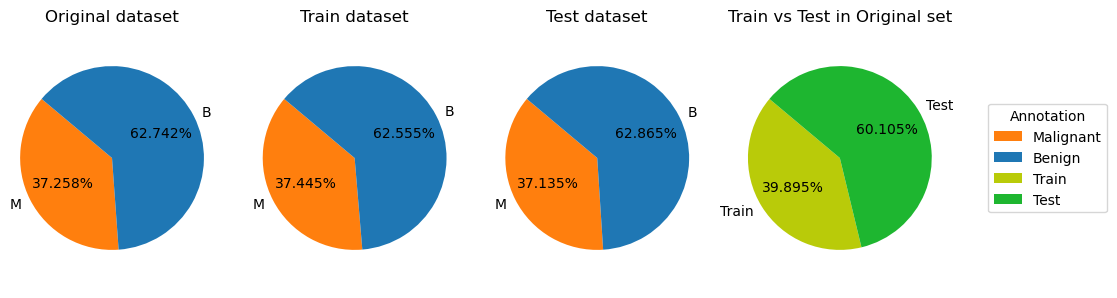

In [5]:
drawScatterCharts(label, l1Train, l1Test)

##### b.2. Proportion 2: Train 60% / Test 40%

Spliting dataset:

In [6]:
f2Train, f2Test, l2Train, l2Test = train_test_split(feature, label, test_size = 0.4, random_state = 0, stratify = label)

Visualizing the distributions of classes in all the datasets

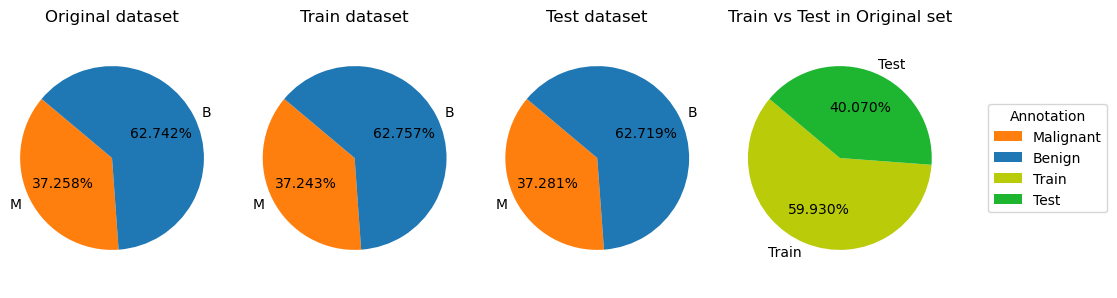

In [7]:
drawScatterCharts(label, l2Train, l2Test)

##### b.3. Proportion 3: Train 80% / Test 20%

Spliting dataset:

In [8]:
f3Train, f3Test, l3Train, l3Test = train_test_split(feature, label, test_size = 0.2, random_state = 0, stratify = label)

Visualizing the distributions of classes in all the datasets

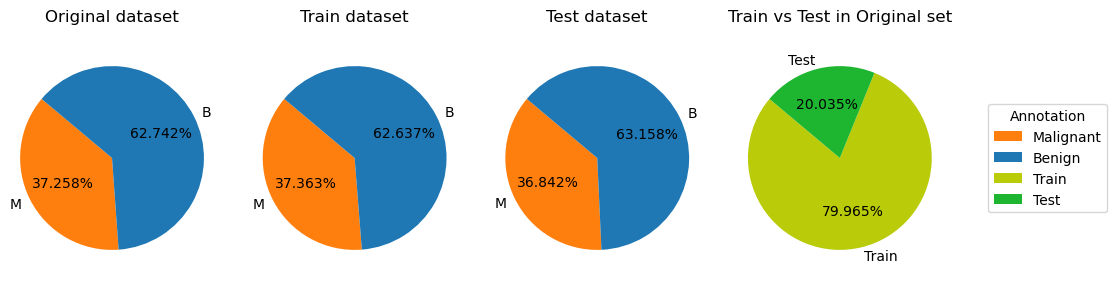

In [9]:
drawScatterCharts(label, l3Train, l3Test)

##### b.4. Proportion 4: Train 90% / Test 10%

Spliting dataset:

In [10]:
f4Train, f4Test, l4Train, l4Test = train_test_split(feature, label, test_size = 0.1, random_state = 0, stratify = label)

Visualizing the distributions of classes in all the datasets

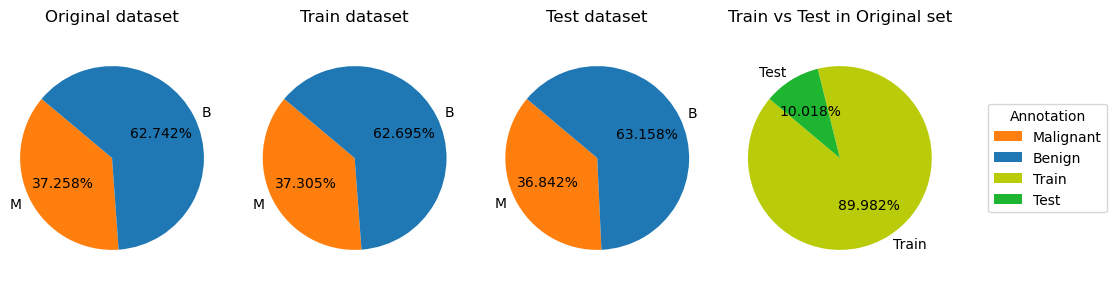

In [11]:
drawScatterCharts(label, l4Train, l4Test)

<hr>

## <span id = "p1"><a href = "#head" style = "text-decoration: none; color: inherit">II. Building the decision tree classifiers</a></span>

### 1. Functions used in this section

In [12]:
def trainDesTree(feature, label, featureTest, labelTest, maxDepth = None):
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = maxDepth)
    classifier = classifier.fit(feature, label)
    accuracy = classifier.score(featureTest, labelTest)
    
    dot_data = export_graphviz(classifier, out_file = None, feature_names = feature.columns.tolist(), class_names = ['Benign', 'Malignant'], filled = True, rounded = True, special_characters = True) 
    graph = graphviz.Source(dot_data)
    return classifier, graph, accuracy

### 2. Building decision trees

#### a. Proportion 1: Train 40% / Test 60%

Training decision trees:

In [13]:
classifier1, graph, _ = trainDesTree(f1Train, l1Train, f1Test, l1Test)

Visualizing the resulting decision tree

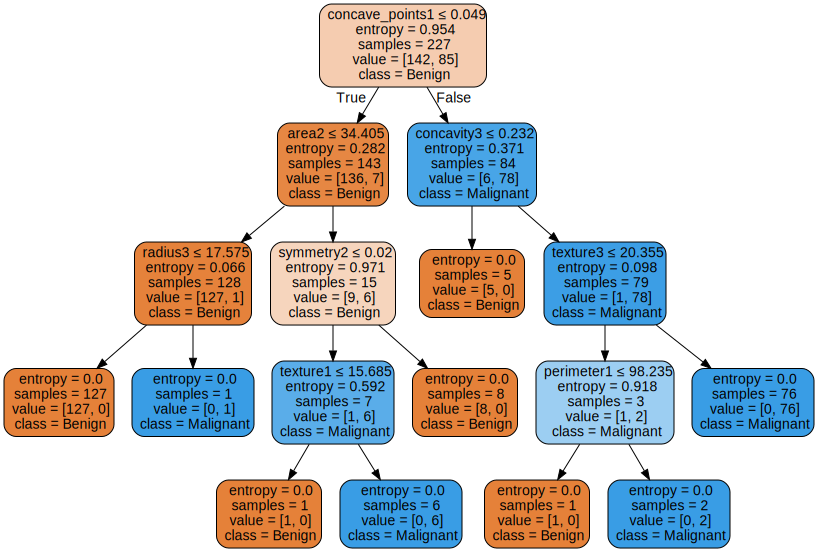

In [14]:
graph

#### b. Proportion 2: Train 60% / Test 40%

Training decision trees:

In [15]:
classifier2, graph, _ = trainDesTree(f2Train, l2Train, f2Test, l2Test)

Visualizing the resulting decision tree

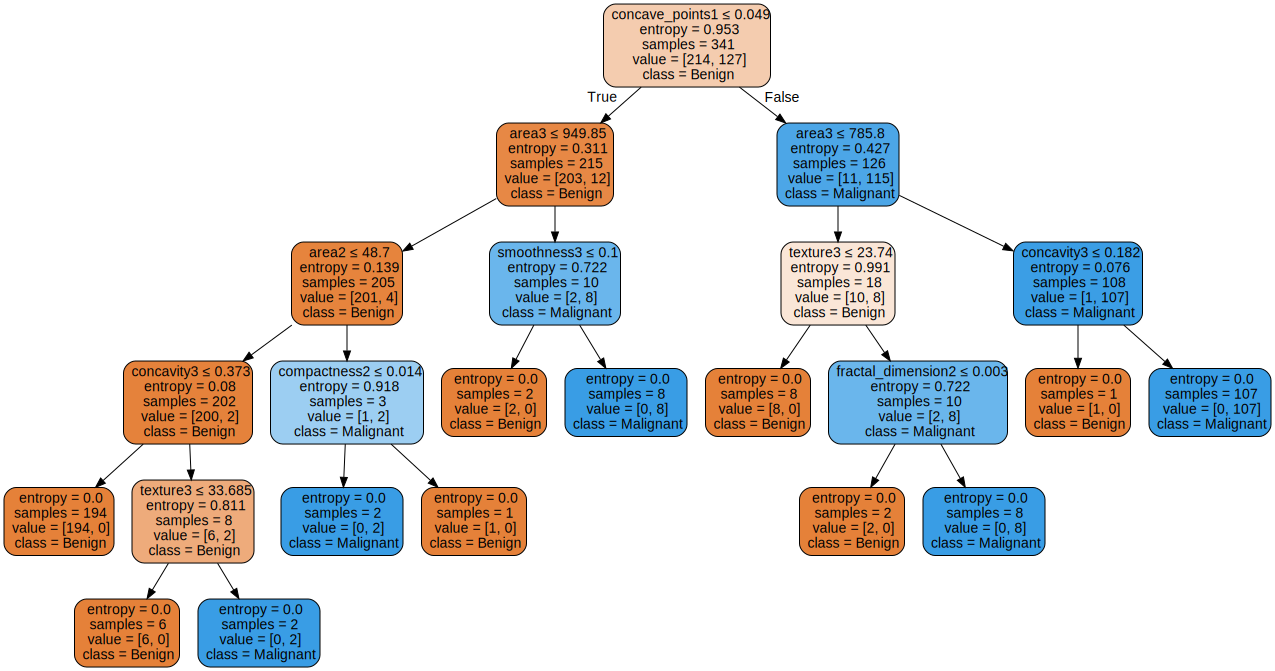

In [16]:
graph

#### c. Proportion 3: Train 80% / Test 20%

Training decision trees:

In [17]:
classifier3, graph, _ = trainDesTree(f3Train, l3Train, f3Test, l3Test)

Visualizing the resulting decision tree

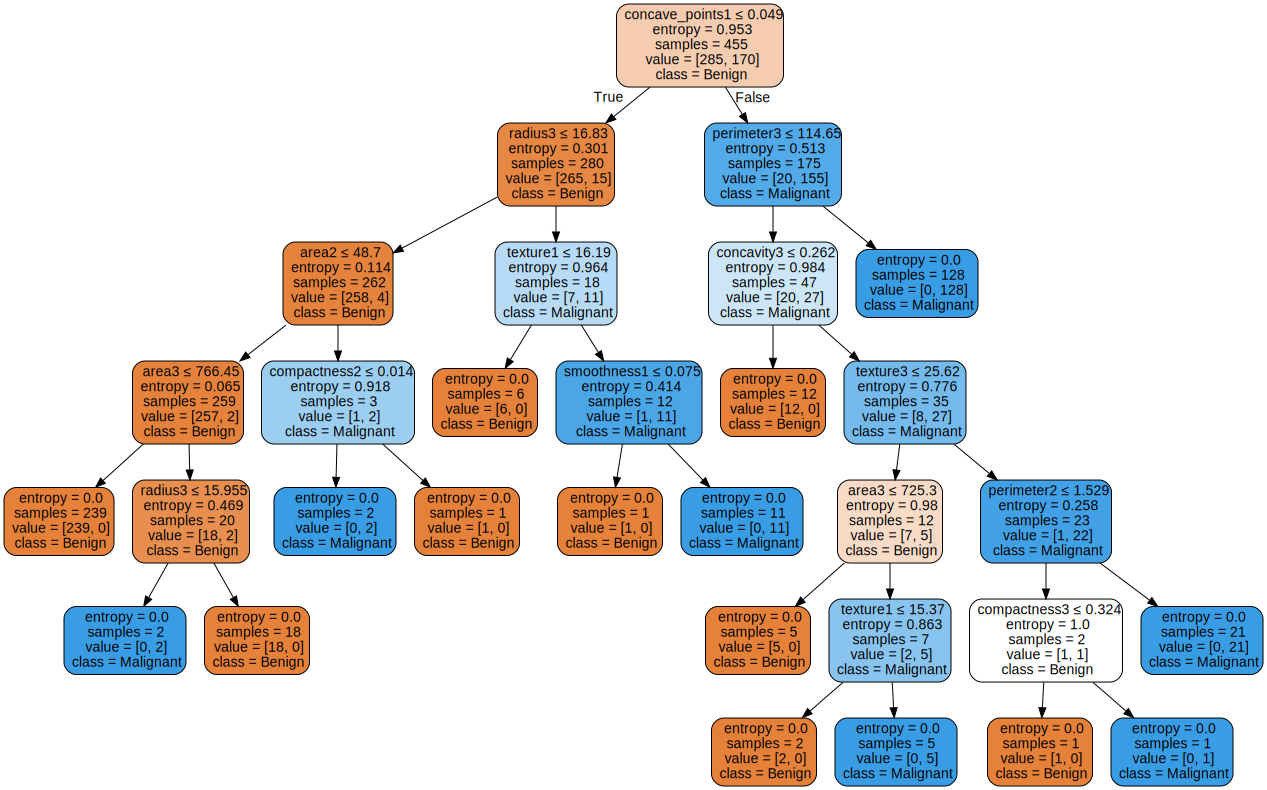

In [18]:
graph

#### d. Proportion 4: Train 90% / Test 10%

Training decision trees:

In [19]:
classifier4, graph, _ = trainDesTree(f4Train, l4Train, f4Test, l4Test)

Visualizing the resulting decision tree

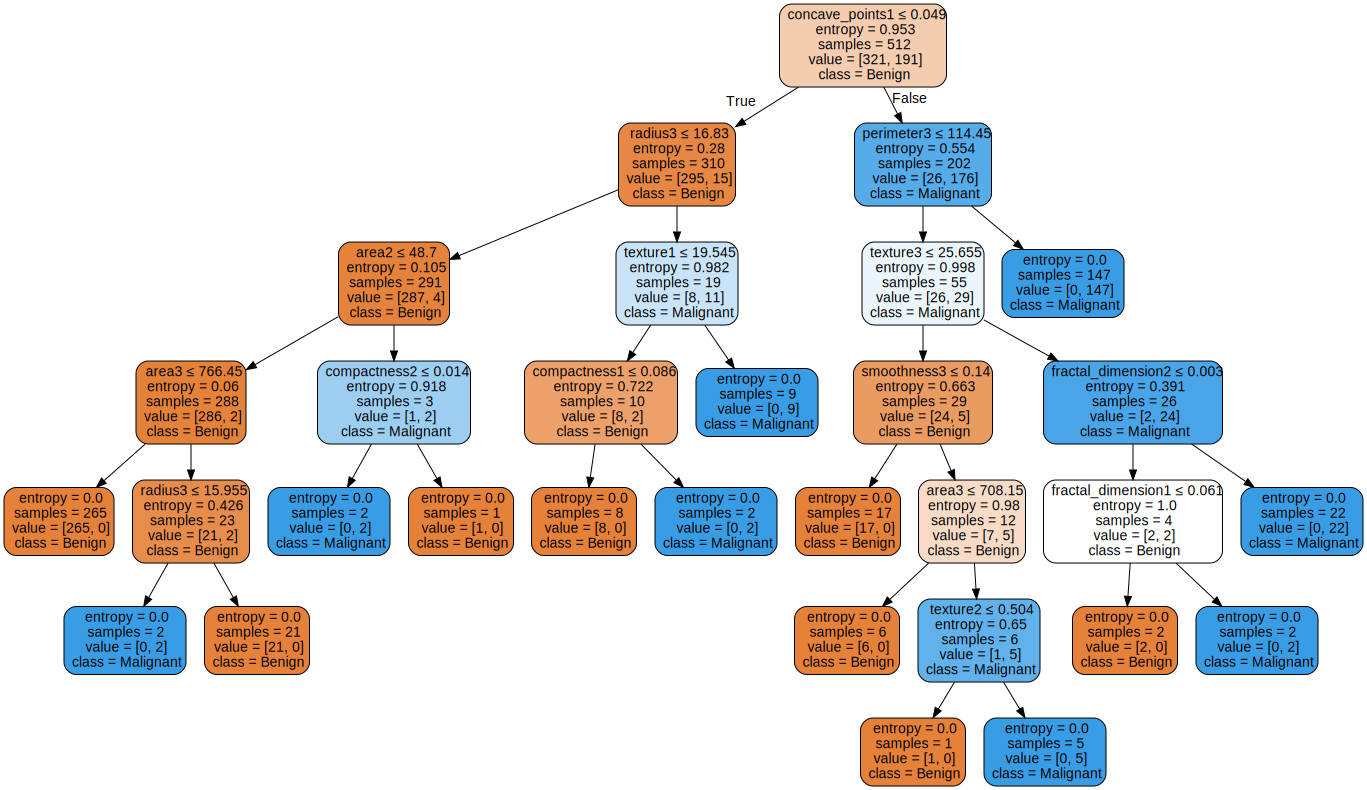

In [20]:
graph

<hr>

## <span id = "p2"><a href = "#head" style = "text-decoration: none; color: inherit">III. Evaluating the decision tree classifiers</a></span>

### 1. Function drawConfusionMatrix(feature, label, classifier, cmap = 'Blues'): Draw confusion matrix through a heatmap

In [21]:
def drawConfusionMatrix(feature, label, classifier, cmap = 'Blues'):
    _ = ConfusionMatrixDisplay.from_estimator(classifier, feature, label, display_labels=['Benign', 'Malignant'], cmap=cmap)
    plt.title("Decision Tree Classifier confusion matrix")
    plt.yticks(rotation=90)
    plt.show()

### 2. Proportion 1: Train 40% / Test 60%

#### a. Classification report

In [22]:
predict1 = classifier1.predict(f1Test)
print(classification_report(l1Test, predict1, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.95      0.94      0.95       215
   Malignant       0.90      0.92      0.91       127

    accuracy                           0.93       342
   macro avg       0.93      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342



#### b. Confusion matrix

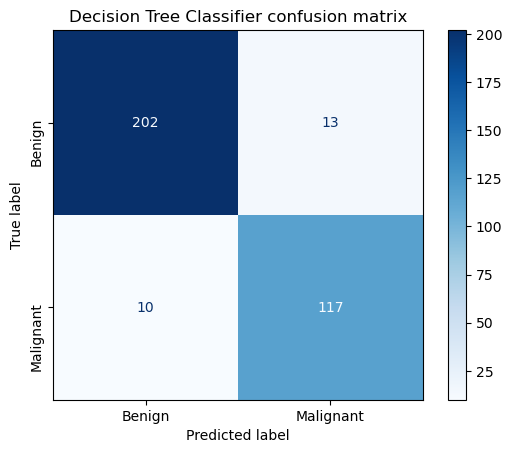

In [23]:
drawConfusionMatrix(f1Test, l1Test, classifier1)

### 3. Proportion 2: Train 60% / Test 40%

#### a. Classification report

In [24]:
predict2 = classifier2.predict(f2Test)
print(classification_report(l2Test, predict2, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.96      0.92      0.94       143
   Malignant       0.88      0.94      0.91        85

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



#### b. Confusion matrix

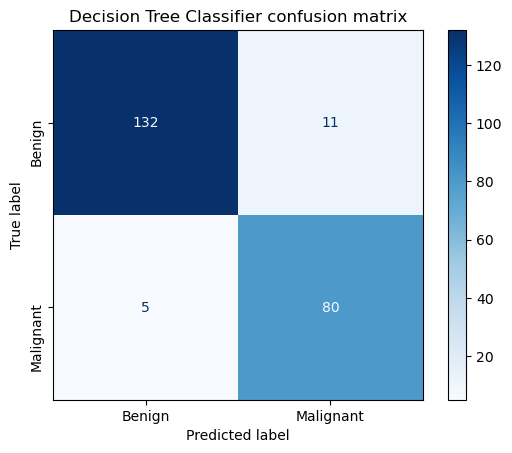

In [25]:
drawConfusionMatrix(f2Test, l2Test, classifier2)

### 4. Proportion 3: Train 80% / Test 20%

#### a. Classification report

In [26]:
predict3 = classifier3.predict(f3Test)
print(classification_report(l3Test, predict3, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97        72
   Malignant       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### b. Confusion matrix

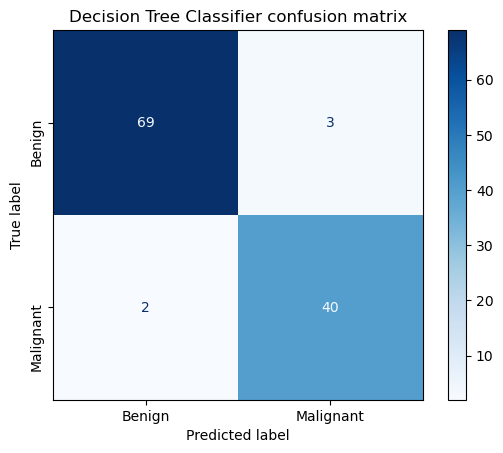

In [27]:
drawConfusionMatrix(f3Test, l3Test, classifier3)

### 5. Proportion 4: Train 90% / Test 10%

#### a. Classification report

In [28]:
predict4 = classifier4.predict(f4Test)
print(classification_report(l4Test, predict4, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        36
   Malignant       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



#### b. Confusion matrix

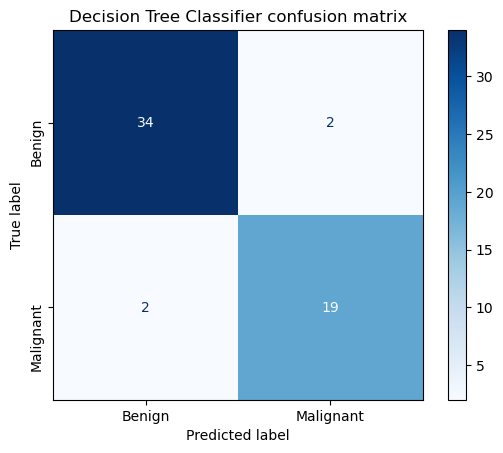

In [29]:
drawConfusionMatrix(f4Test, l4Test, classifier4)

<hr>

## <span id = "p3"><a href = "#head" style = "text-decoration: none; color: inherit">IV. The depth and accuracy of a decision tree</a></span>

### 1. Visualizing decision tree with each max_depth value

#### a. No max depth (max_depth = None)

Create decision tree

In [30]:
_, graph, accuracy1 = trainDesTree(f3Train, l3Train, f3Test, l3Test)

Display decision tree

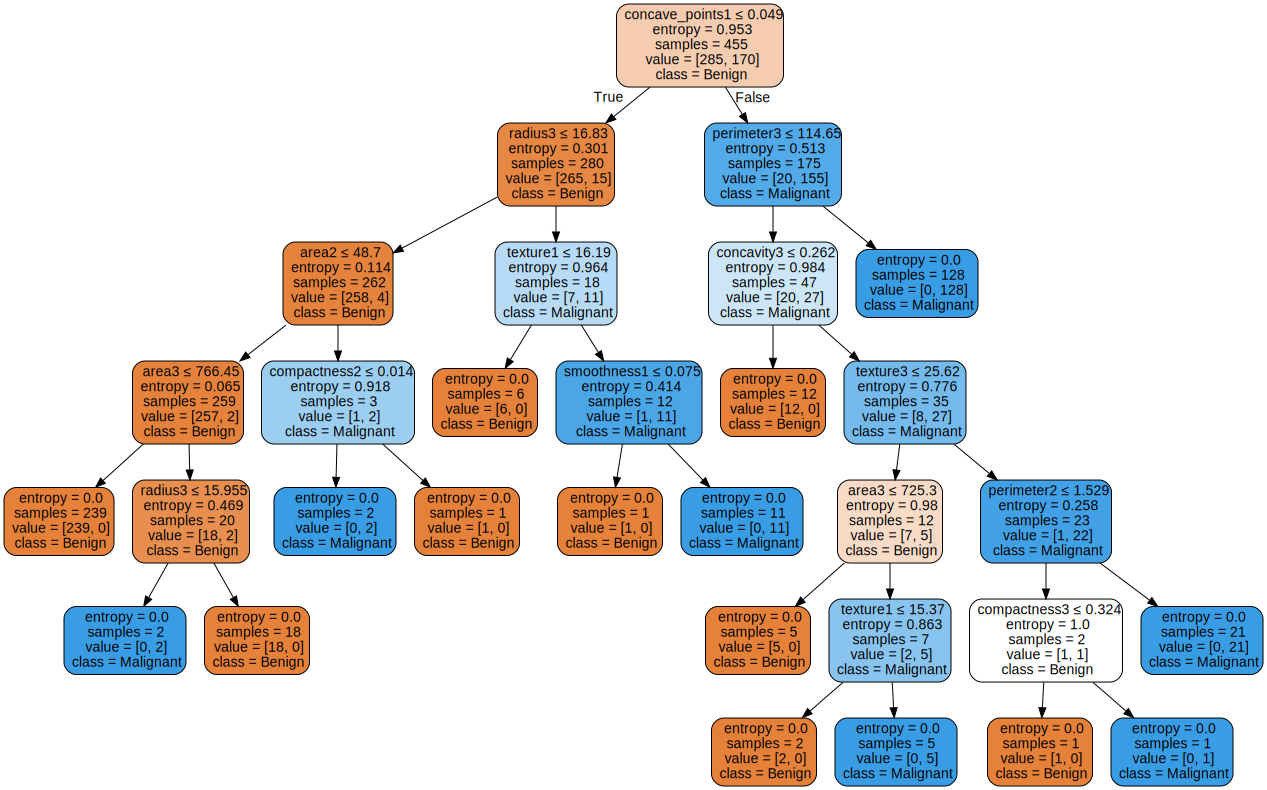

In [31]:
graph

#### b. Max depth = 2

Create decision tree

In [32]:
_, graph, accuracy2 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 2)

Display decision tree

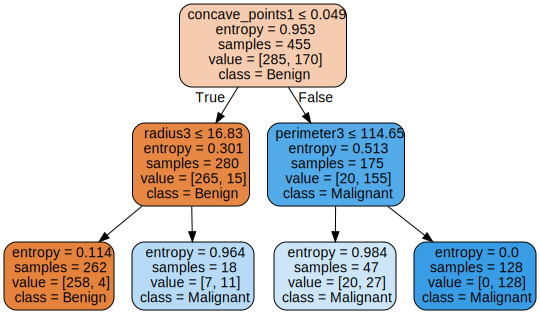

In [33]:
graph

#### c. Max depth = 3

Create decision tree

In [34]:
_, graph, accuracy3 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 3)

Display decision tree

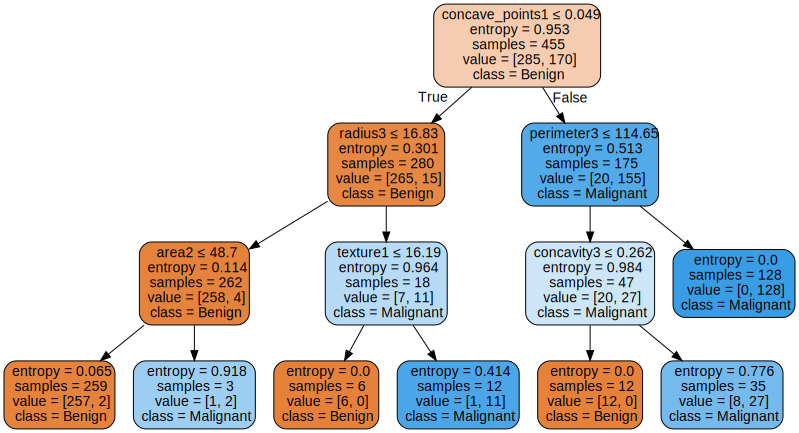

In [35]:
graph

#### d. Max depth = 4

Create decision tree

In [36]:
_, graph, accuracy4 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 4)

Display decision tree

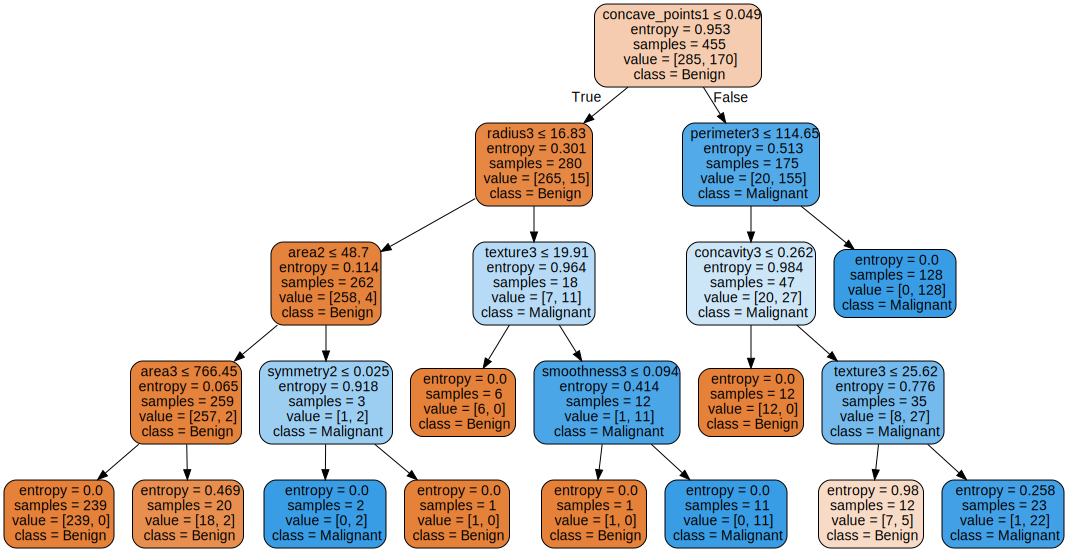

In [37]:
graph

#### e. Max depth = 5

Create decision tree

In [38]:
_, graph, accuracy5 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 5)

Display decision tree

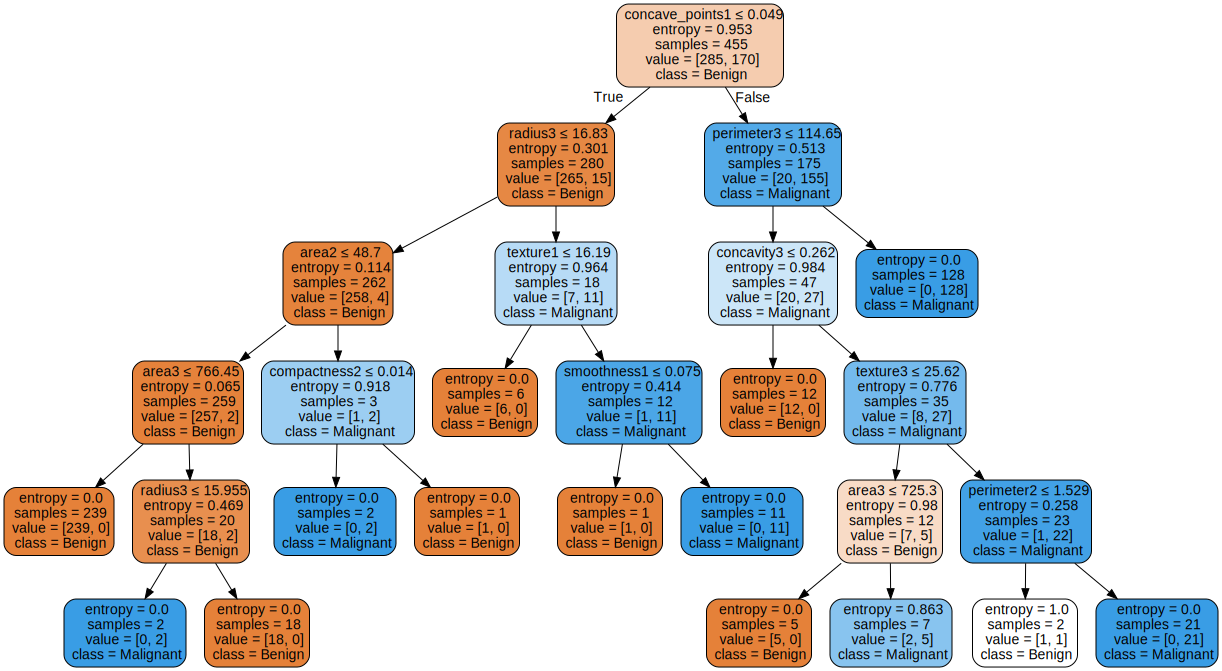

In [39]:
graph

#### f. Max depth = 6

Create decision tree

In [40]:
_, graph, accuracy6 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 6)

Display decision tree

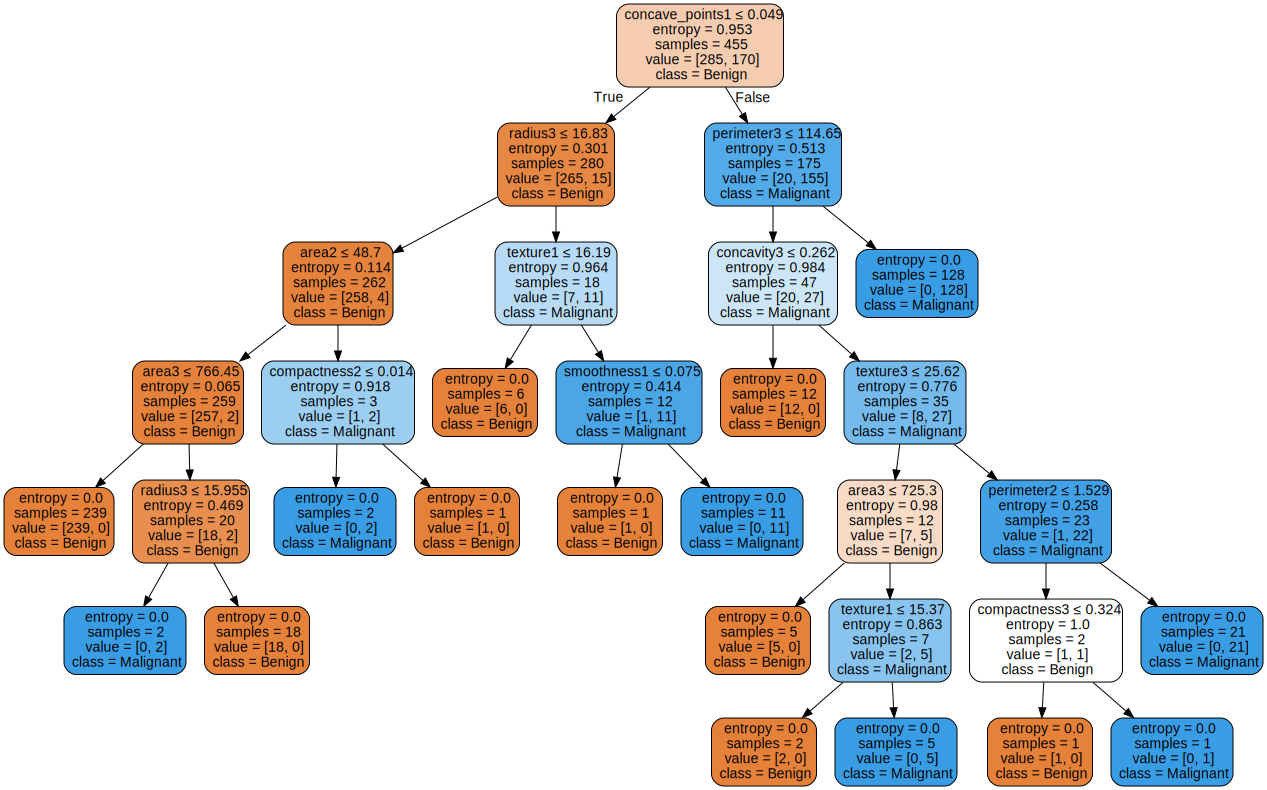

In [41]:
graph

#### g. Max depth = 7

Create decision tree

In [42]:
_, graph, accuracy7 = trainDesTree(f3Train, l3Train, f3Test, l3Test, maxDepth = 7)

Display decision tree

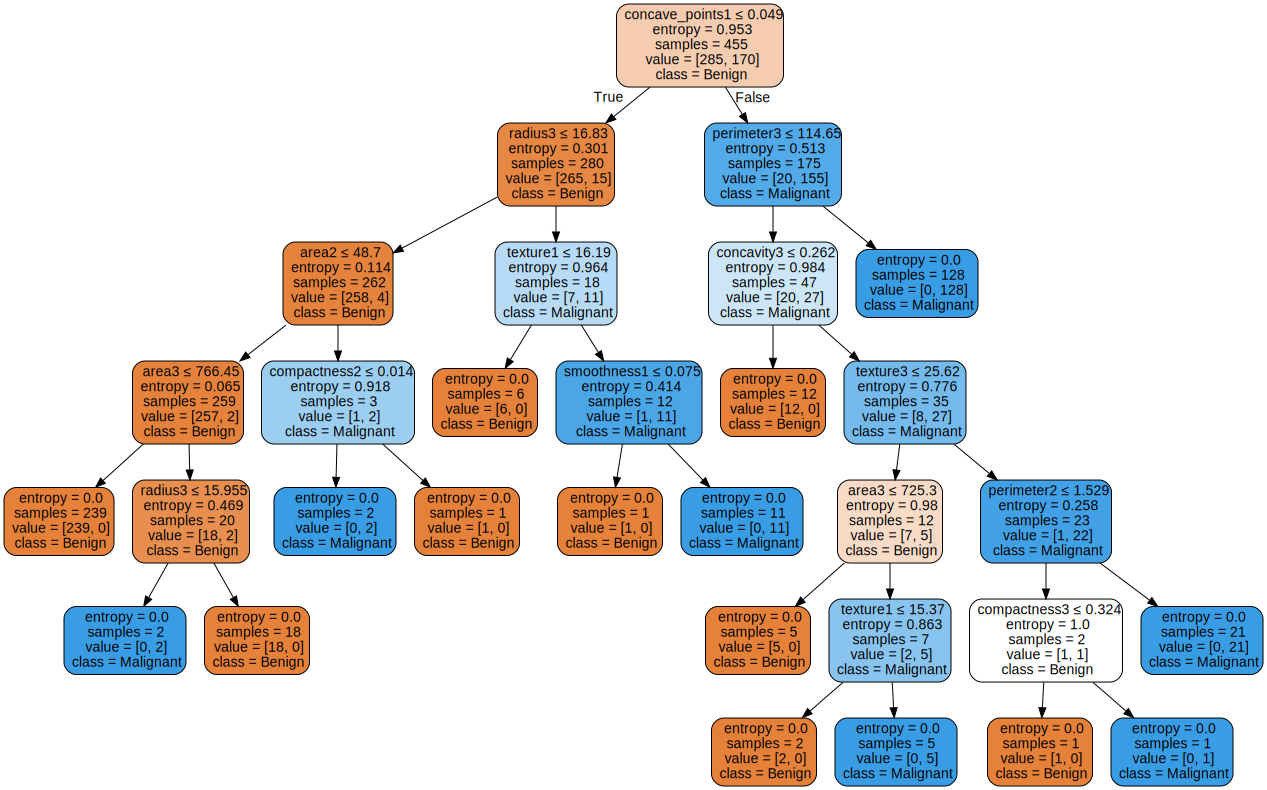

In [43]:
graph

### 2. Accuracy reporting

#### a. Library used in this section

This library is used to display a markdown table in a Python cell

In [44]:
from IPython.display import display, Markdown

#### b. Report

In [45]:
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7]

table = """
| max_depth   | None | 2 | 3 | 4 | 5 | 6 | 7 |
|:------------|:-----:|:---:|:---:|:---:|:---:|:---:|:---:|
| Accuracy    | {:.5f} | {:.5f} | {:.5f} | {:.5f} | {:.5f} | {:.5f} | {:.5f} |
""".format(*accuracies)

In [46]:
display(Markdown(table))


| max_depth   | None | 2 | 3 | 4 | 5 | 6 | 7 |
|:------------|:-----:|:---:|:---:|:---:|:---:|:---:|:---:|
| Accuracy    | 0.95614 | 0.88596 | 0.93860 | 0.96491 | 0.95614 | 0.95614 | 0.95614 |
